In [10]:
from sklearn.feature_extraction.text import CountVectorizer

allsentences = ["This pasta is very tasty and affordable.", "This pasta is not tasty and is affordable.", "This pasta is very very delicious."]

Countvectorizer = CountVectorizer()

X = Countvectorizer.fit_transform(allsentences)

result = X.toarray()

print(f"Result of Bag of Words {result}")


Result of Bag of Words [[1 1 0 1 0 1 1 1 1]
 [1 1 0 2 1 1 1 1 0]
 [0 0 1 1 0 1 0 1 2]]


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 

allsentences = ["This pasta is very tasty and affordable.", "This pasta is not tasty and is affordable.", "This pasta is very very delicious."]

vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(allsentences)
feature_names = vectorizer.get_feature_names_out()
print(f"Feature names \n{feature_names}")
matrix = vectors.todense()
denselist = matrix.tolist()


df = pd.DataFrame(denselist, columns=feature_names)
print(f"Final Result of Tf-Idf \n {df}")


Feature names 
['affordable' 'and' 'delicious' 'is' 'not' 'pasta' 'tasty' 'this' 'very']
Final Result of Tf-Idf 
    affordable       and  delicious        is       not     pasta     tasty  \
0    0.414896  0.414896   0.000000  0.322204  0.000000  0.322204  0.414896   
1    0.346117  0.346117   0.000000  0.537582  0.455102  0.268791  0.346117   
2    0.000000  0.000000   0.478909  0.282851  0.000000  0.282851  0.000000   

       this      very  
0  0.322204  0.414896  
1  0.268791  0.000000  
2  0.282851  0.728445  


In [12]:
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
with open("./content/example_text.txt", 'r', encoding='utf-8') as txt:
    sentences = txt.readlines()
    
print(f"Number of sentences {len(sentences)}")

print(f"First sentence from text file \n {sentences[0]}")

Number of sentences 20
First sentence from text file 
 As I ventured deeper into the heart of the ancient forest, the landscape transformed into a mesmerizing tapestry of greenery. 



In [14]:
print(f"First sentence before removing punctuations \n {sentences[0]}")

for index in range(len(sentences)):
    sentences[index] = re.sub("[^a-zA-Z]"," ", str(sentences[index]))
    
print(f"First sentence after removing punctuations \n {sentences[0]}")

First sentence before removing punctuations 
 As I ventured deeper into the heart of the ancient forest, the landscape transformed into a mesmerizing tapestry of greenery. 

First sentence after removing punctuations 
 As I ventured deeper into the heart of the ancient forest  the landscape transformed into a mesmerizing tapestry of greenery   


In [15]:
word_tokenizer = []
for sent in sentences :
    word_tokens = word_tokenize(sent)
    word_tokenizer.append(word_tokens)
    
print(f"First sentence after tokenize \n {word_tokenizer[0]}")

First sentence after tokenize 
 ['As', 'I', 'ventured', 'deeper', 'into', 'the', 'heart', 'of', 'the', 'ancient', 'forest', 'the', 'landscape', 'transformed', 'into', 'a', 'mesmerizing', 'tapestry', 'of', 'greenery']


In [16]:
from gensim.models import Word2Vec

model_cbow = Word2Vec(sentences=word_tokenizer,
                        vector_size=2,
                        window=2,
                        min_count=2,
                        workers=1,
                        sg=0
                        )

words_cbow = list(model_cbow.wv.key_to_index.keys())
print(f"Total number of words {len(words_cbow)}")

vector = model_cbow.wv['tree']

Total number of words 52


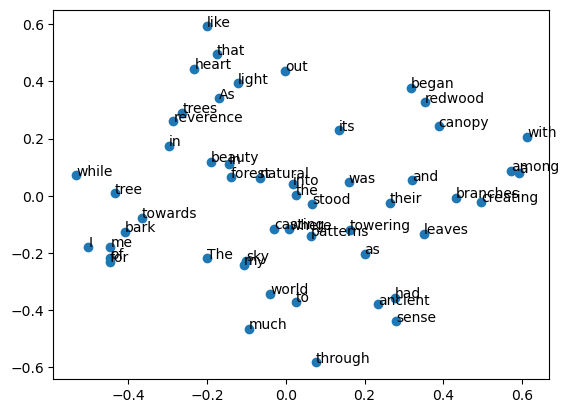

In [17]:
X = model_cbow.wv[model_cbow.wv.index_to_key]

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.index_to_key)

for i, word in enumerate(words_cbow[:100]):
    plt.annotate(text=word, xy=(result[i,0], result[i,1]))

plt.show()

In [18]:
from gensim.models import Word2Vec

model_skip = Word2Vec(sentences=word_tokenizer,
                        vector_size=2,
                        window=2,
                        min_count=4,
                        workers=1,
                        sg=1
                        )

words_skip = list(model_skip.wv.key_to_index.keys())

print(f"Total number of words {len(words_skip)}")

wordembedding = model_skip.wv['tree']
print(wordembedding)

Total number of words 15
[0.3670822 0.2538364]


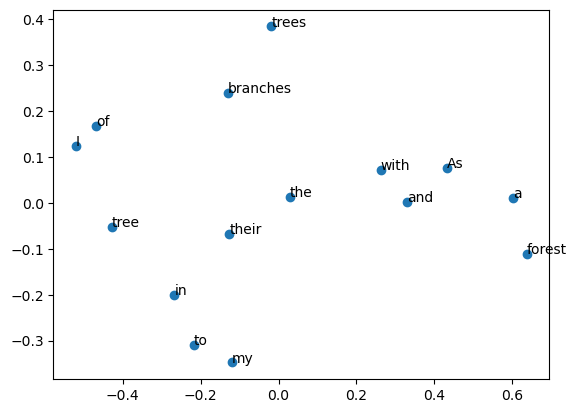

In [20]:
X = model_skip.wv[model_skip.wv.index_to_key]

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.index_to_key)

for i, word in enumerate(words_skip[:100]):
    plt.annotate(text=word, xy=(result[i,0], result[i,1]))

plt.show()

In [22]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'

model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [23]:
result = model.most_similar(positive=['woman','king'], negative=['man'], topn=1)
print(f"Result ? mark in the following sentence King - man = ? - woman :- {result}")

Result ? mark in the following sentence King - man = ? - woman :- [('queen', 0.7118193507194519)]


In [25]:
from gensim.scripts.glove2word2vec import glove2word2vec

from gensim.models import KeyedVectors
input_file = "glove.6B.100d.txt"
output_file = "glove.6B.100d.txt.word2vec"

glove2word2vec(input_file, output_file)

model = KeyedVectors.load_word2vec_format(output_file, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"Result :- {result}")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_11420\1786309676.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(input_file, output_file)


Result :- [('queen', 0.7698541283607483)]
